Input: Experimental data and l0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Experimental data for crack density vs. applied stress
applied_stress = np.array([10, 20, 30, 40, 50])  # MPa
crack_density = np.array([0.0, 0.03, 0.12, 0.22, 0.30])  # cracks per mm

# Characteristic material length scale [mm]
l0 = 0.1  # e.g., average fiber bundle diameter

print("l0=", l0, "mm")

l0= 0.1 mm


Weibull-based crack density model

In [21]:
def crack_density_model(stress, sigma0, m):
    return (1/l0) * (1 - np.exp(-(stress/sigma0)**m))


Curve Fitting

In [22]:
# Initial guess: [sigma0, m]
p0 = [30, 5]

# Fit the model to the data
params, cov = curve_fit(crack_density_model, applied_stress, crack_density, p0=p0, bounds=(0, np.inf))
sigma0_fit, m_fit = params


Results

Fitted Weibull Parameters:
Characteristic strength σ₀ = 172.61 MPa
Weibull modulus m = 2.58


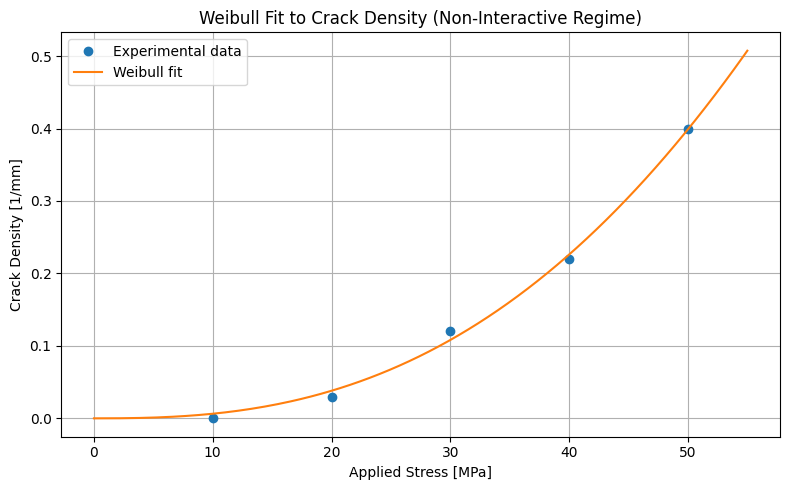

In [23]:
print("Fitted Weibull Parameters:")
print(f"Characteristic strength σ₀ = {sigma0_fit:.2f} MPa")
print(f"Weibull modulus m = {m_fit:.2f}")

stress_plot = np.linspace(0, applied_stress.max()*1.1, 200)
fitted_crack_density = crack_density_model(stress_plot, sigma0_fit, m_fit)

plt.figure(figsize=(8,5))
plt.plot(applied_stress, crack_density, 'o', label='Experimental data')
plt.plot(stress_plot, fitted_crack_density, '-', label='Weibull fit')
plt.xlabel('Applied Stress [MPa]')
plt.ylabel('Crack Density [1/mm]')
plt.title('Weibull Fit to Crack Density (Non-Interactive Regime)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()